# The CIFAR-10 dataset

The CIFAR-10 dataset is composed of 60,000 color images that are 32x32 pixels in size. These images are categorized into 10 different classes, with each class having 6,000 images. The dataset is further divided into 50,000 training images and 10,000 test images.

To be more specific, the dataset is split into five training batches and one test batch. Each batch contains 10,000 images. The test batch is made up of 1,000 randomly selected images from each class. On the other hand, the training batches consist of the remaining images in a random order. It is important to note that some training batches may have a higher number of images from one class compared to another. However, when combined, the training batches contain exactly 5,000 images from each class.

In [9]:
# Import necessary libraries
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import datasets, models, layers

In [10]:
# Load CIFAR-10 dataset
data = tf.keras.datasets.cifar10  

In [11]:
# Split training and test sets
(train_images, train_labels), (test_images, test_labels) = data.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [12]:
# Print shape of training images  
train_images.shape 

(50000, 32, 32, 3)

In [13]:
# Print shape of test images
test_images.shape   

(10000, 32, 32, 3)

In [14]:
# Print label of first training image
print(train_labels[0])  

[6]


In [15]:
# Print first training image  
print(train_images[1])

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]


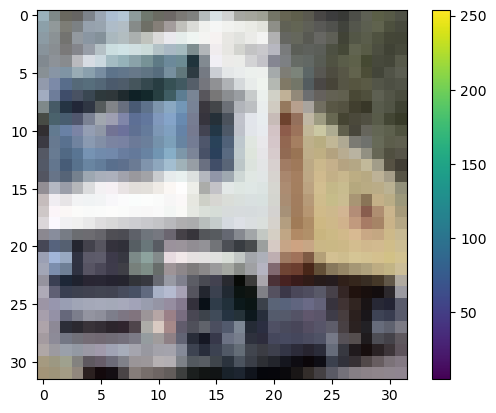

In [17]:
# Display first training image
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

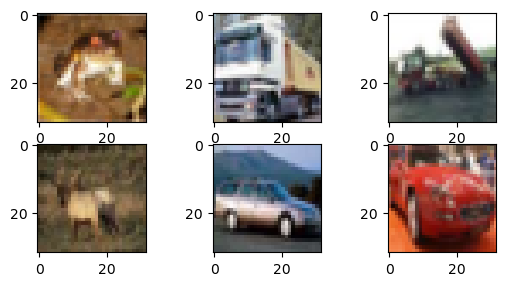

In [18]:
# Display 6 sample training images 
for i in range(6):
    # Define subplot
    plt.subplot(330 + 1 + i)
    # Plot raw pixel data
    plt.imshow(train_images[i])
plt.show()

In [19]:
# Normalize pixel values to [0,1]
train_images, test_images = train_images / 255.0, test_images / 255.0  

In [20]:
# Define convolutional neural network
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [21]:
# Print model summary
model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [25]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train model
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 44s 27ms/step - loss: 1.4758 - accuracy: 0.4641 - val_loss: 1.2007 - val_accuracy: 0.5681
Epoch 2/20
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0979 - accuracy: 0.6123 - val_loss: 1.0684 - val_accuracy: 0.6257
Epoch 3/20
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9400 - accuracy: 0.6696 - val_loss: 0.9285 - val_accuracy: 0.6766
Epoch 4/20
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8359 - accuracy: 0.7053 - val_loss: 0.9177 - val_accuracy: 0.6870
Epoch 5/20
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7602 - accuracy: 0.7331 - val_loss: 0.8652 - val_accuracy: 0.7062
Epoch 6/20
1563/1563 [==============================] - 41s 27ms/step - loss: 0.6945 - accuracy: 0.7542 - val_loss: 0.8592 - val_accuracy: 0.7117
Epoch 7/20
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6365 - accuracy: 0.7762 - val_loss: 0.8220 -

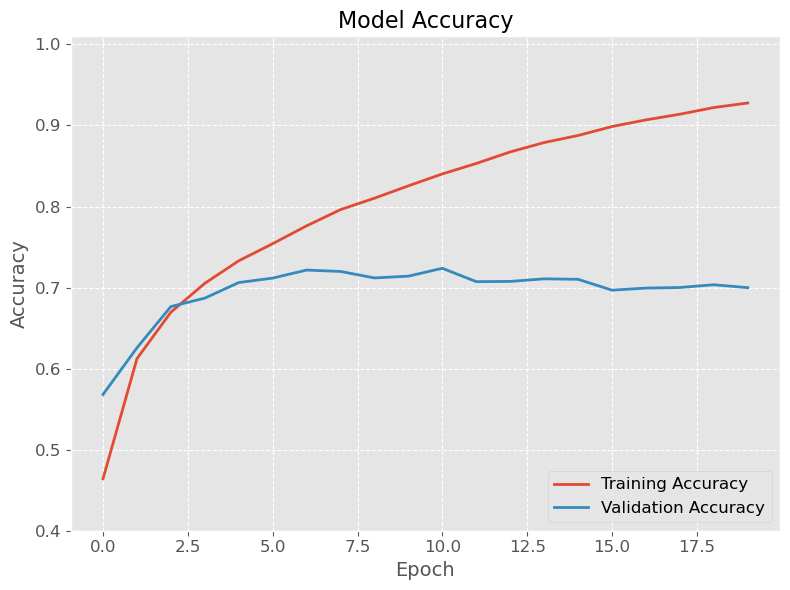

In [26]:
# Plot accuracy  
plt.style.use('ggplot')
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', linewidth=2)
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.tick_params(labelsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.ylim(0.4,1.01)
plt.yticks(np.arange(0.4, 1.01, 0.1))
plt.grid(linestyle='--')
plt.tight_layout()
plt.savefig('accuracy_plot.png', dpi=300)
plt.show()